In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [89]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [90]:
customer_data=pd.read_csv("customer_data.csv")
churn_data=pd.read_csv("churn_data.csv")
internet_data=pd.read_csv("internet_data.csv")


In [91]:
df=pd.merge(churn_data,customer_data,how="inner",on="customerID")


In [92]:
telecom=pd.merge(df,internet_data,how="inner",on="customerID")

In [93]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [94]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [95]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [109]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [110]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,NaN,NaN,29.85,29.85,NaN,0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,NaN,NaN,56.95,1889.5,NaN,0,NaN,NaN,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,NaN,NaN,53.85,108.15,NaN,0,NaN,NaN,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,NaN,NaN,42.30,1840.75,NaN,0,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,NaN,NaN,70.70,151.65,NaN,0,NaN,NaN,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [102]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [103]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,NaN,Month-to-month,NaN,Electronic check,29.85,29.85,NaN,Female,0,NaN,NaN,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,NaN,One year,NaN,Mailed check,56.95,1889.5,NaN,Male,0,NaN,NaN,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,NaN,Month-to-month,NaN,Mailed check,53.85,108.15,NaN,Male,0,NaN,NaN,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,NaN,One year,NaN,Bank transfer (automatic),42.30,1840.75,NaN,Male,0,NaN,NaN,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,NaN,Month-to-month,NaN,Electronic check,70.70,151.65,NaN,Female,0,NaN,NaN,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [104]:
#drop repeated table
telecom=telecom.drop(["Contract","PaymentMethod","gender","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection" ,"TechSupport", 	"StreamingTV" 	,"StreamingMovies"],1)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,NaN,NaN,29.85,29.85,NaN,0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,NaN,NaN,56.95,1889.5,NaN,0,NaN,NaN,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,NaN,NaN,53.85,108.15,NaN,0,NaN,NaN,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,NaN,NaN,42.30,1840.75,NaN,0,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,NaN,NaN,70.70,151.65,NaN,0,NaN,NaN,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [106]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           0 non-null      float64
 3   PaperlessBilling                       0 non-null      float64
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  0 non-null      float64
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                0 non-null      float64
 9   Dependents                             0 non-null      float64
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [80]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
SeniorCitizen                            0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProtection_No                      0
DeviceProtection_Yes                     0
TechSupport_No                           0
TechSupport_Yes                          0
StreamingTV

In [81]:
telecom.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [83]:
#Normalizing the continuous values
df=telecom[["tenure","MonthlyCharges","TotalCharges"]]


In [84]:
normalized_df=(df-df.mean())/df.std()

In [85]:
telecom=telecom.drop(["tenure","MonthlyCharges","TotalCharges"],1)

In [86]:
telecom=pd.concat([telecom,normalized_df],axis=1)

In [87]:
telecom

,customerID,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MonthlyCharges,TotalCharges,tenure
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,-1.160241,NaN,-1.277354
1,5575-GNVDE,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,-0.259611,NaN,0.066323
2,3668-QPYBK,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,-0.362635,NaN,-1.236636
3,7795-CFOCW,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,-0.746482,NaN,0.514215
4,9237-HQITU,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0.197351,NaN,-1.236636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0.665945,NaN,-0.340852
7039,2234-XADUH,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1.277443,NaN,1.613587
7040,4801-JZAZL,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,-1.168549,NaN,-0.870179
7041,8361-LTMKD,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0.320315,NaN,-1.155201


In [ ]:
#hyperparameter tunning


In [ ]:
folds=KFold(n_splits=5,shuffle=True,random_state=100)
hyper_params=[({"n_features_to_select":list(range(1,14))})]

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm)

In [ ]:
model_cv=GridSearchCV(estimator=rfe,param_grid=hyper_params,scoring="r2",cv=folds,verbose=1,return_train_score=True)

In [ ]:
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010522,0.000921,0.001341,0.000208,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,0.321164,0.243658,0.077627,13,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.009399,0.000248,0.001295,0.000043,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,0.482093,0.438360,0.058374,12,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.009157,0.001274,0.001352,0.000204,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,0.526976,0.516805,0.059902,11,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
3,0.009512,0.002341,0.001338,0.000122,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,0.520072,0.526272,0.053074,10,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296
4,0.008684,0.001799,0.001429,0.000152,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,0.520846,0.541889,0.049257,8,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847
5,0.007159,0.000193,0.001279,0.000034,6,{'n_features_to_select': 6},0.512477,0.628849,0.488411,0.527379,0.548197,0.541063,0.048029,9,0.626959,0.603122,0.596348,0.606852,0.601063,0.606869,0.010602
6,0.006160,0.000183,0.001299,0.000245,7,{'n_features_to_select': 7},0.568887,0.664093,0.552385,0.534634,0.568182,0.577636,0.045006,7,0.658577,0.638501,0.630137,0.646285,0.638313,0.642363,0.009582
7,0.005856,0.000169,0.001170,0.000085,8,{'n_features_to_select': 8},0.570639,0.665608,0.592323,0.550001,0.580407,0.591795,0.039428,6,0.674146,0.640825,0.654028,0.658665,0.657277,0.656988,0.010651
8,0.005014,0.000321,0.001134,0.000062,9,{'n_features_to_select': 9},0.578843,0.694189,0.606220,0.590777,0.606732,0.615352,0.040767,4,0.676043,0.652605,0.659579,0.668996,0.664321,0.664309,0.007988
9,0.004292,0.000165,0.001147,0.000038,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.594335,0.578852,0.608547,0.043498,5,0.686032,0.661729,0.674558,0.678443,0.677153,0.675583,0.007910


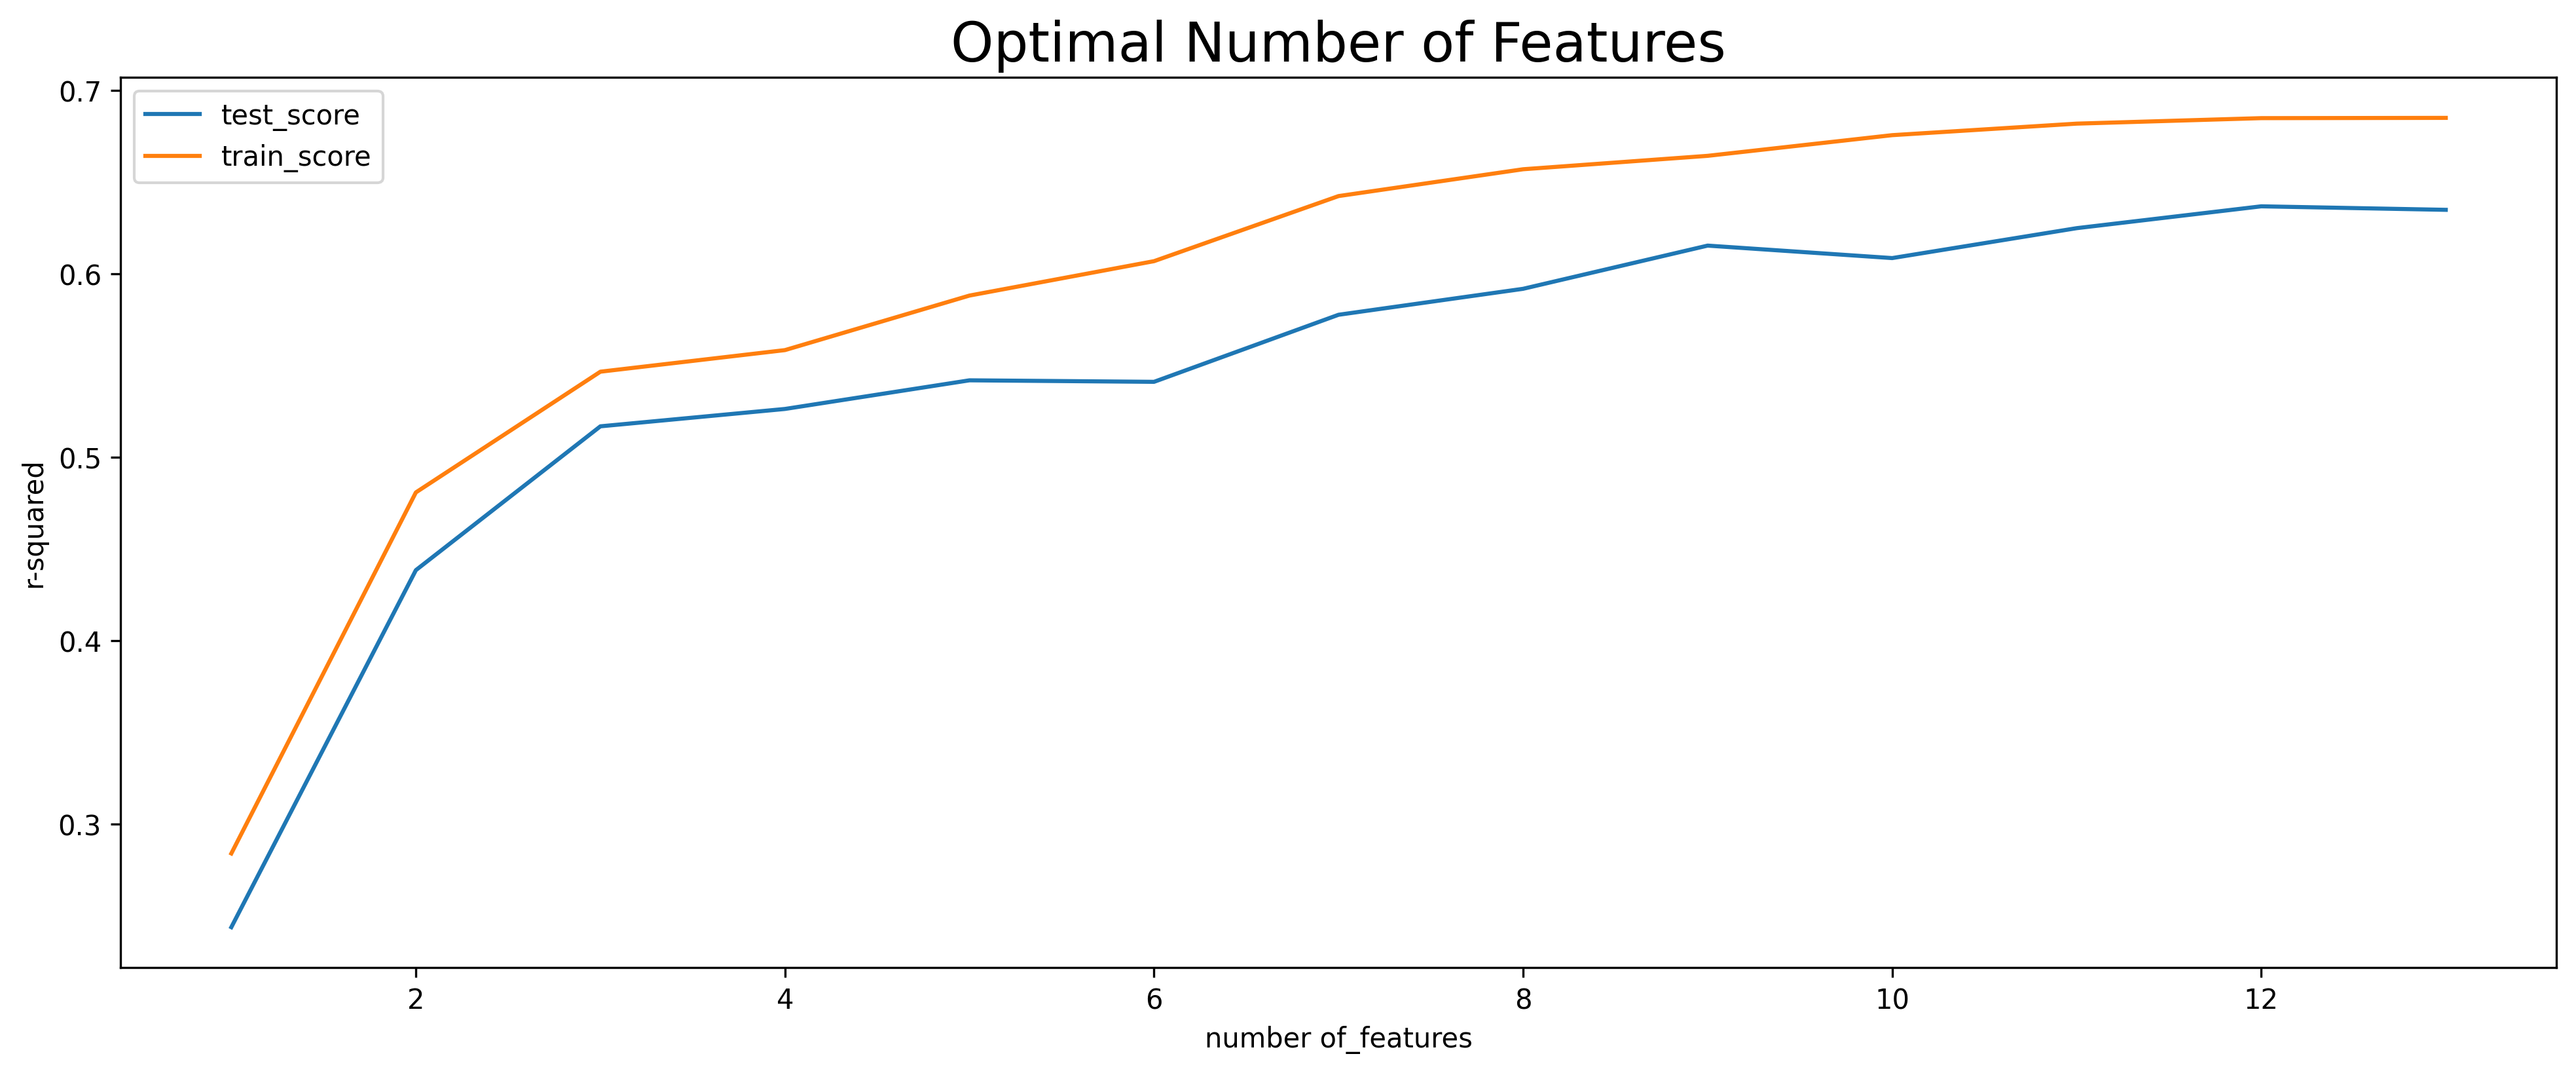

In [ ]:
plt.figure(figsize=(16,6),dpi=300)
plt.plot(cv_results["param_n_features_to_select"],cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"],cv_results["mean_train_score"])
plt.xlabel("number of_features")
plt.ylabel("r-squared")
plt.title("Optimal Number of Features",fontsize=20)
plt.legend(["test_score","train_score"],loc="upper_left")

In [ ]:
#final_optimal values

In [ ]:
n_features_optimal=10
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,n_features_to_select=n_features_optimal)
rfe=rfe.fit(x_train,y_train)
y_pred=lm.predict(x_test)
r2=sklearn.metrics.r2_score(y_test,y_pred)
print(r2)

0.599557533872853
